# Soal 4
## Crypto.csv
### Header

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import scipy
from scipy.stats import gamma
import matplotlib.pyplot as plt

### Membaca data

In [2]:
data = pd.read_csv('crypto.csv', header = None)
data.columns = ['Amount']
data

Amount
0       0.000015
1       0.000023
2       0.000033
3       0.000037
4       0.000037
5       0.000037
6       0.000036
7       0.000073
8       0.000072
9       0.000073
10      0.000067
11      0.000069
12      0.000082
13      0.000113
14      0.000111
15      0.000112
16      0.000124
17      0.000124
18      0.000113
19      0.000109
20      0.000098
21      0.000090
22      0.000086
23      0.000085
24      0.000085
25      0.000084
26      0.000082
27      0.000081
28      0.000060
29      0.000037
...          ...
632188  0.113194
632189  0.087992
632190  0.101825
632191  0.334725
632192  0.690254
632193  0.625767
632194  0.230924
632195  0.114744
632196  0.089624
632197  0.143865
632198  0.112651
632199  0.126489
632200  0.145279
632201  0.132727
632202  0.126085
632203  0.225772
632204  0.129094
632205  0.228046
632206  0.323451
632207  0.073590
632208  0.074413
632209  0.061524
632210  0.130473
632211  0.211989
632212  0.070326
632213  0.045676
632214  0.057948
632215  0.082787
632216  0.091944
632217  0.089511

[632218 rows x 1 columns]

### Deskripsi data
#### Deskripsi data numerik

In [3]:
def mode(x):
    return x.value_counts().index[0]
data.agg({'Amount':['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurtosis']})

Amount
min       2.925000e-09
max       2.383502e+06
mean      2.030181e+02
mode      2.000000e-06
median    9.733500e-03
var       7.532042e+07
std       8.678734e+03
skew      1.182396e+02
kurtosis  2.229747e+04

#### Deskripsi data objek (tidak ada objek non-numerik)

### Boxplot

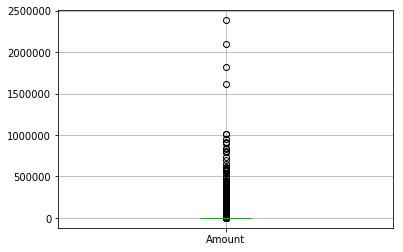

In [4]:
amt = data[['Amount']]
amt.boxplot()

### Histogram

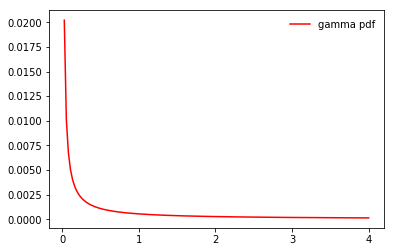

In [5]:
#alp, locx, bt = gamma.fit(amt)
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 4, 150)
beta = amt.var() / amt.mean()
alpha = amt.mean() / beta
ax.plot(x, gamma.pdf(x, alpha, 0, beta), 'r-', label='gamma pdf')
#ax.hist(amt, density='True')
ax.legend(loc='best', frameon=False)
plt.xticks([0,1,2,3,4])
plt.show()

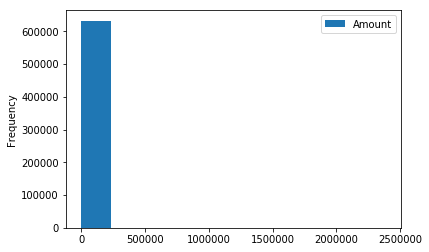

In [6]:
amt.plot(kind = 'hist')

### Fungsi distribusi peluang
#### Fungsi distribusi peluang yang digunakan adalah distribusi gamma. Fungsi ini digunakan melihat dari tipe data yang memiliki frekuensi sangat tinggi pada satu sisi dan kemudian secara bertahap berkurang, namun tidak memenuhi kriteria untuk menggunakan distribusi eksponensial maupun chi-squared.

### Jawaban pertanyaan 4-a-i
#### Ekspektasi jumlah cryptocurrency dengan nilai kurang dari 0.177013.
#### Diselesaikan dengan menghitung fungsi peluang gamma untuk nilai < 0.177013 lalu kalikan dengan 1000 kali sampel. Sebelumnya tentukan dahulu nilai alpha dan beta dari sampel dengan melihat variansi dan rata-rata data

In [7]:
from scipy.stats import gamma

beta = amt.var() / amt.mean()
alpha = amt.mean() / beta

prob4a = gamma.cdf(0.177013, alpha, scale = beta)
(prob4a * 1000).astype(np.int64)

array([992], dtype=int64)

In [8]:
alc = amt[amt < 0.177013].count()
alc2 = amt.shape[0]
((alc / alc2 * 1000).round(0)).astype(np.int64)

Amount    780
dtype: int64

### Jawaban pertanyaan 4-a-ii
#### Ekspektasi jumlah cryptocurrency dengan nilai lebih dari 177.013.
#### Diselesaikan dengan menghitung fungsi peluang gamma untuk nilai > 177.013 lalu kalikan dengan 1000 kali sampel

In [9]:
prob4a2 = gamma.sf(177.013, alpha, scale = beta)
(prob4a2 * 1000).astype(np.int64)

array([3], dtype=int64)

In [10]:
alc = amt[amt > 177.013].count()
alc2 = amt.shape[0]
((alc / alc2 * 1000).round(0)).astype(np.int64)

Amount    11
dtype: int64

### Jawaban pertanyaan 4-b-i
#### Ekspektasi cryptocurrency baru dengan nilai lebih dari 0.013
#### Diselesaikan dengan langsung menghitung fungsi peluang gamma untuk nilai > 0.013

In [11]:
prob4b = gamma.sf(0.013, alpha, scale = beta)
prob4b

array([0.0090372])

In [12]:
alc = amt[amt > 0.013].count()
alc2 = amt.shape[0]
alc / alc2

Amount    0.46514
dtype: float64

### Jawaban pertanyaan 4-b-ii
#### Ekspektasi cryptocurrency baru dengan nilai kurang dari 17.7
#### Diselesaikan dengan langsung menghitung fungsi peluang gamma untuk nilai < 17.7

In [13]:
prob4b2 = gamma.cdf(17.7, alpha, scale = beta)
prob4b2

array([0.99488372])

In [14]:
alc = amt[amt < 17.7].count()
alc2 = amt.shape[0]
alc / alc2

Amount    0.972634
dtype: float64